<a href="https://colab.research.google.com/github/philo-shoby/AlexNet-ASL-Recognition-using-Hand-Gestures/blob/master/Distance_detection_using_triangle_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from imutils import paths
import numpy as np
import imutils
import cv2


In [0]:
def find_marker(image):
	# convert the image to grayscale, blur it, and detect edges
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray, (5, 5), 0)
	edged = cv2.Canny(gray, 35, 125)
	# find the contours in the edged image and keep the largest one;
	# we'll assume that this is our piece of paper in the image
	cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key = cv2.contourArea)
	# compute the bounding box of the of the paper region and return it
	return cv2.minAreaRect(c)

In [0]:
def distance_to_camera(knownWidth, focalLength, perWidth):
	return (knownWidth * focalLength) / perWidth

In [0]:
KNOWN_DISTANCE = 10.0
KNOWN_WIDTH = 5.0
image = cv2.imread("/content/c2c/Clip-On-Frame38.jpg")
marker = find_marker(image)
focalLength = (marker[1][0] * KNOWN_DISTANCE) / KNOWN_WIDTH
print(focalLength)

447.99993896484375


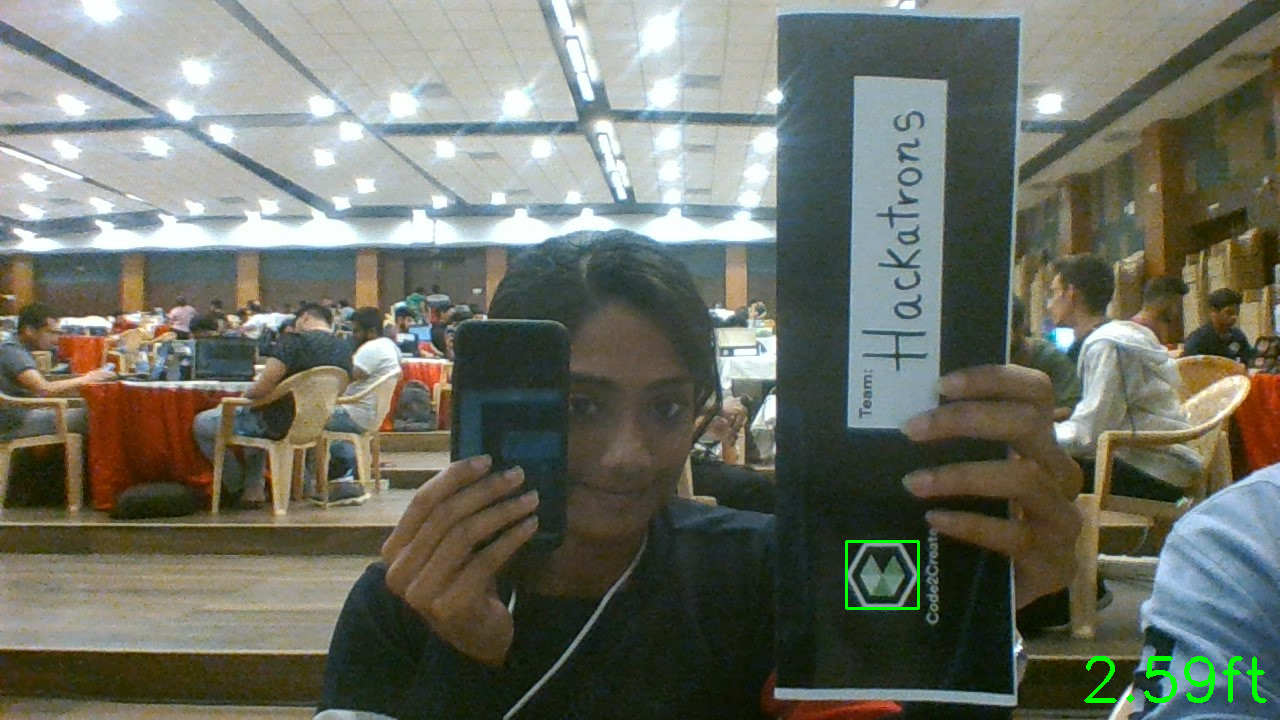

-1

In [0]:
'''for imagePath in sorted(paths.list_images("images")):'''
from google.colab.patches import cv2_imshow
	# load the image, find the marker in the image, then compute the
	# distance to the marker from the camera
image = cv2.imread('/content/c2c/pic.jpg')
marker = find_marker(image)
inches = distance_to_camera(KNOWN_WIDTH, focalLength, marker[1][0])
# draw a bounding box around the image and display it
box = cv2.cv.BoxPoints(marker) if imutils.is_cv2() else cv2.boxPoints(marker)
box = np.int0(box)
cv2.drawContours(image, [box], -1, (0, 255, 0), 2)
cv2.putText(image, "%.2fft" % (inches / 12),
	(image.shape[1] - 200, image.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX,
	2.0, (0, 255, 0), 3)
cv2_imshow(image)
cv2.waitKey(0)